In [10]:
import pandas as pd
import numpy as np
tr_addr = '../input/raw/train_'
user_info_cols  = ['id', 'sex', 'job', 'edu', 'marriage', 'loc_type']
user_info_train = pd.read_csv(tr_addr + 'user_info.csv', names = user_info_cols, index_col = 'id')
print user_info_train.shape
print user_info_train.head()
print user_info_train['sex'].unique()
print user_info_train['job'].unique()
print user_info_train['edu'].unique()
print user_info_train['marriage'].unique()
print user_info_train['loc_type'].unique()

(55596, 5)
      sex  job  edu  marriage  loc_type
id                                     
3150    1    2    4         1         4
6965    1    2    4         3         2
1265    1    3    4         3         1
6360    1    2    4         3         2
2583    2    2    2         1         1
[1 2 0]
[2 3 4 0 1]
[4 2 3 1 0]
[1 3 2 4 0 5]
[4 2 1 3 0]


Populating the interactive namespace from numpy and matplotlib
    sex  job  edu  marriage  loc_type  y  userid
id                                              
1     1    2    3         1         3  0       1
2     1    2    3         2         1  0       2
3     1    4    4         1         4  0       3
4     1    4    4         3         2  1       4
5     1    2    2         3         1  0       5
               sex       job       edu  marriage  loc_type         y    userid
sex       1.000000  0.042330  0.028506  0.072395 -0.076455 -0.099846  0.022600
job       0.042330  1.000000  0.174664  0.109869  0.024775  0.008267 -0.006121
edu       0.028506  0.174664  1.000000  0.103718  0.200118  0.038704  0.008796
marriage  0.072395  0.109869  0.103718  1.000000 -0.126798  0.003968  0.037366
loc_type -0.076455  0.024775  0.200118 -0.126798  1.000000  0.010664  0.019538
y        -0.099846  0.008267  0.038704  0.003968  0.010664  1.000000  0.035161
userid    0.022600 -0.006121  0.008796  0

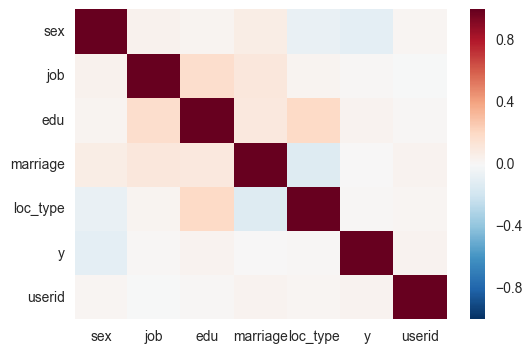

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
train_y = pd.read_csv('../input/raw/train_overdue.csv', names=['id', 'y'], index_col = 'id')
data = user_info_train.join(train_y, how='outer')
data['userid'] = train_y.index

In [19]:
for col in ['sex', 'job', 'edu', 'marriage', 'loc_type']:
    user_info_train[col] = user_info_train[col].astype('str')
data1 = pd.get_dummies(user_info_train)
print data1.head()
print data1.shape

      sex_0  sex_1  sex_2  job_0  job_1  job_2  job_3  job_4  edu_0  edu_1  \
id                                                                           
3150    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
6965    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
1265    0.0    1.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
6360    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
2583    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   

         ...      marriage_1  marriage_2  marriage_3  marriage_4  marriage_5  \
id       ...                                                                   
3150     ...             1.0         0.0         0.0         0.0         0.0   
6965     ...             0.0         0.0         1.0         0.0         0.0   
1265     ...             0.0         0.0         1.0         0.0         0.0   
6360     ...             0.0         0.0         1.0 

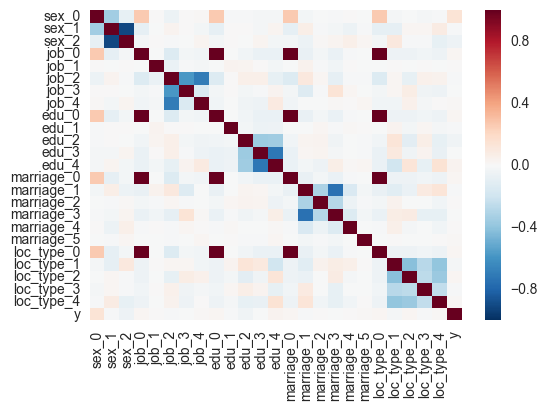

In [20]:
data2 = data1.join(train_y, how='outer')
data2 = data2.corr()  
sns.heatmap(data2)  
plt.show() 

(55596, 1)
(13899, 1)


(array([  2253.,    524.,    386.,    642.,   2554.,   4183.,   7826.,
         10796.,  13225.,  13207.]),
 array([  5.91485589e+09,   5.91658389e+09,   5.91831189e+09,
          5.92003989e+09,   5.92176789e+09,   5.92349589e+09,
          5.92522389e+09,   5.92695189e+09,   5.92867989e+09,
          5.93040789e+09,   5.93213589e+09]),
 <a list of 10 Patch objects>)

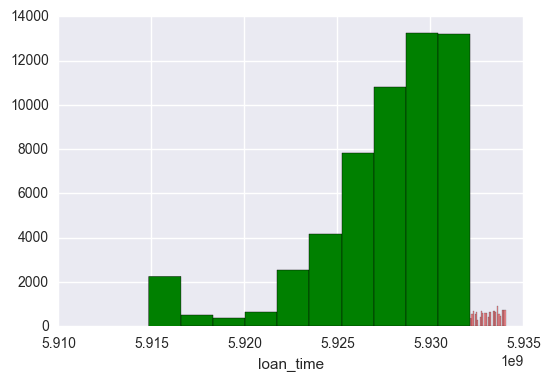

In [37]:
loan_time_cols  = ['id', 'loan_time']
te_addr  = '../input/raw/test_'
loan_time_train = pd.read_csv(tr_addr + 'loan_time.csv', names = loan_time_cols, index_col = 'id')
loan_time_test  = pd.read_csv(te_addr + 'loan_time.csv', names = loan_time_cols, index_col = 'id')
print loan_time_train.shape
print loan_time_test.shape
# sns.distplot(loan_time_train['loan_time'],bins = 30,color = 'green',kde = False) 
sns.distplot(loan_time_test['loan_time'],bins = 30 ,color = 'red',kde = False)
plt.hist(loan_time_train['loan_time'],color = 'green')

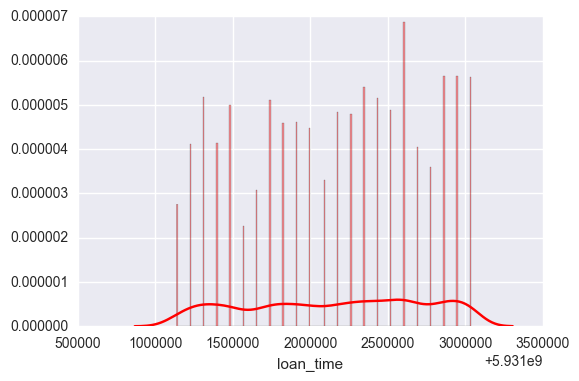

In [28]:
sns.distplot(loan_time_test['loan_time'], kde = True,color = 'red',bins = 200)